## Load in all the modules needed

In [ ]:
%pylab notebook
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
from cetbtools.ease2conv import Ease2Transform
from mpl_toolkits.basemap import Basemap

In [2]:
%cd scripts
%ls

/mnt/data3/cetb/jupyter_notebooks/scripts
CETB_algorithms.py             CETB_read_functions.py
CETB_analysis.py               CETB_read_functions.py~
CETB_analysis.py~              CETB_read_functions_v2.py
CETB_read_functions-Copy1.py*  CETB_read_functions.working021919backup.py
CETB_read_functionsg.py        CLPX.py
CETB_read_functionsg.py~       __pycache__/


In [3]:
from CETB_read_functions import read_Tb
from CETB_read_functions import read_Tb_std_dev
from CETB_read_functions import coords
from CETB_read_functions import calc_DAV
from CETB_read_functions import find_GLaIL_cube_offset
from CETB_read_functions import find_WesternUS_cube_offset
from CETB_read_functions import find_GreatLakes_cube_offset
from CETB_read_functions import find_WesternCA_cube_offset
from CETB_read_functions import find_Barents_cube_offset
from CETB_read_functions import find_Laptev_cube_offset
from CETB_read_functions import grid_locations_of_GLaIL
from CETB_read_functions import grid_locations_of_WesternUS
from CETB_read_functions import grid_locations_of_GreatLakes
from CETB_read_functions import grid_locations_of_WesternCA
from CETB_read_functions import grid_locations_of_Barents
from CETB_read_functions import grid_locations_of_Laptev
from CETB_algorithms import DAV_MOD
from CETB_algorithms import XPGR
from CETB_algorithms import end_high_DAV
from CETB_algorithms import D_DAV
from CETB_algorithms import Winter_DAV
from CETB_analysis import Tb_hist_annual
from CETB_analysis import DAV_hist_annual
from CETB_analysis import Tb_hist_monthly
from CETB_analysis import DAV_hist_monthly
from CETB_analysis import TbDAV_series_one_year
from CETB_analysis import early_melt_events
from CETB_analysis import min_max_series
from CETB_analysis import MOD_array
from CETB_analysis import MOD_array_year

## Specify inputs

In [4]:
#Specify region, satellite, sensor, channel, and image reconstruction algorithm of interest in file name
# this notebook will read in 2 CETB datasets so that channels/algorithms/sensors can be compared
region='WesternCA'  #make this the same syntax as cubefilenames and sub-directory
sat_GRD='AQUA'   #'AQUA' for AMSRE, 'F13','F14','F15'... for SSMI
sat_SIR= 'AQUA'
sensor_GRD='AMSRE'  #'AMSRE', 'SSMI', etc.
sensor_SIR='AMSRE'
channel_GRD='36V'  #'36V','36H', '18V','18H', etc. '19V','19H' and '37V','37H' for SSMI)
channel_SIR='36V'
alg_GRD='GRD'   #SIR or GRD
alg_SIR='SIR'

if sensor_GRD=='SSMI':
    provider='CSU' 
    version='v1.3'
elif sensor_GRD=='AMSRE':
    provider='RSS'
    version='v1.3'

# either change to the directory where the data is or specify it
datadir_GRD = '/home/mij216/Desktop/data3/cetb/cubes/'+sat_GRD+'_'+sensor_GRD+'/'+region+'/' 
datadir_SIR = '/home/mij216/Desktop/data3/cetb/cubes/'+sat_SIR+'_'+sensor_SIR+'/'+region+'/' 

# prefix filepath
prefix_GRD='CETB.cubefile.'+region+'.'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_GRD+'-'+provider+'-'+version
prefix_SIR='CETB.cubefile.'+region+'.'+sat_SIR+'_'+sensor_SIR+'-'+channel_SIR+'-'+alg_SIR+'-'+provider+'-'+version

# years for each sensor

if sat_GRD=='F13' or sat_SIR=='F13':
    Years = [2002,2003,2004,2005,2006,2007,2008,2009]
elif sat_GRD=='F14' or sat_SIR=='F14':
    Years=[2002,2003,2004,2005,2006,2007,2008]
elif sat_GRD=='F15' or sat_SIR=='F15':
    Years=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
elif sat_GRD=='AQUA' or sat_SIR=='AQUA':
    Years=[2003,2004,2005,2006,2007,2008,2009,2010,2011]

#Enter a site name for titles of plots
# enter latitutde and longitude in decimal degrees

#Site='Low Relief Test, Alberta 49.73,-111.14'
#Site='Senator Beck'

Site='NWT C57 04242006 Spring Migration'
lat_start=62.61
lon_start=-109.64

#Site='Great Slave Lake'
#lat_start=61.87167   
#lon_start=-114.05

#Site='Great Slave Lake - 2 '
#a little west and south of site 1
#lat_start=  61.50
#lon_start=-114.5

#Site='Great Slave Lake - 3 mixed pixel '
#a little west and south of site 1
#lat_start=  61.80
#lon_start=-114.65

#Site='Great Slave Lake - 4 mostly land pixel '
#a little west and south of site 1
#lat_start=  62.00
#lon_start=-115.00
#Site='Great Slave Lake - 5 mixed pixel '
#
#lat_start=  62.40
#lon_start=-114.80

In [5]:
# get cube offset for finding row/col
# function is region specific
find_WesternCA_cube_offset(cubeType=None, verbose=False)

(1895.9999999131005, 1743.9999998996689)

In [6]:
# row and col numbers of the GRD pixel
rows_cols=grid_locations_of_WesternCA(lat_start, lon_start)
rows_cols_GRD=[rows_cols[0][2],rows_cols[0][2]+1, rows_cols[1][2], rows_cols[1][2]+1]
rows_cols_GRD

Input lat, lon = 62.610000, -109.640000
 EASE2_N3.125km         : row, col = 2553.818380, 1966.896357
      WesternUS(36H-SIR): row, col = 657.818380, 222.896357
  EASE2_N6.25km         : row, col = 1276.659190, 983.198178
      WesternUS(18H-SIR): row, col = 328.659190, 111.198179
    EASE2_N25km         : row, col = 318.789798, 245.424545
      WesternUS(18H-GRD): row, col = 81.789798, 27.424545
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
223 658 111 329 27 82


[82, 83, 27, 28]

In [7]:
# row and col numbers of the envelope of 64 SIR pixels 
rows_cols_env=[rows_cols_GRD[0]*8,rows_cols_GRD[1]*8, rows_cols_GRD[2]*8, rows_cols_GRD[3]*8]
rows_cols_env

[656, 664, 216, 224]

In [8]:
# 'data' will be a tuple with the first element as the Tb time-series data, days, months, and years 
# to be used in plot/algorithm functions later
data_SIR=read_Tb(datadir_SIR, prefix_SIR, Years,rows_cols_env[0],rows_cols_env[1],rows_cols_env[2],rows_cols_env[3])
CETB_SIR=data_SIR[0]   # 3-D Tb time-series array
cal_date=data_SIR[1]    # 1-D array of dates
cal_year=data_SIR[2]    # 1-D array of years
cal_month=data_SIR[3]   # 1-D array of months
data_GRD=read_Tb(datadir_GRD, prefix_GRD, Years,rows_cols_GRD[0],rows_cols_GRD[1],rows_cols_GRD[2],rows_cols_GRD[3])
CETB_GRD=data_GRD[0]

In [9]:
# calculate DAV for the Tb data that was imported
DAV_SIR=calc_DAV(CETB_SIR)
DAV_GRD=calc_DAV(CETB_GRD)

## MAPS

In [10]:
#Get lat/lon of each pixel in the subset of 64
filename=datadir_SIR+prefix_SIR+'.'+str(2003)+'.TB.nc'	
data=Dataset(filename, "r", format="NETCDF4")

lat=data.variables['latitude'] 
lat=lat[:]
lon=data.variables['longitude']
lon=lon[:]
lat_lon=np.dstack((lat,lon))

coordinates=lat_lon[rows_cols_env[0]:rows_cols_env[1],rows_cols_env[2]:rows_cols_env[3]]

coordinates=coordinates.reshape(((rows_cols_env[1]-rows_cols_env[0])*(rows_cols_env[3]-rows_cols_env[2])),2)
pixel_lats=coordinates[:,0]
pixel_lons=coordinates[:,1]
pixel_lats

array([62.40487135, 62.43206683, 62.45925729, 62.4864427 , 62.51362308,
       62.54079841, 62.56796868, 62.59513388, 62.41454528, 62.4417495 ,
       62.46894872, 62.49614292, 62.52333209, 62.55051623, 62.57769533,
       62.60486938, 62.42419271, 62.45140567, 62.47861363, 62.50581659,
       62.53301454, 62.56020747, 62.58739538, 62.61457826, 62.43381363,
       62.4610353 , 62.48825199, 62.51546369, 62.5426704 , 62.56987211,
       62.59706882, 62.62426051, 62.44340801, 62.47063837, 62.49786377,
       62.5250842 , 62.55229966, 62.57951013, 62.60671561, 62.63391609,
       62.45297583, 62.48021486, 62.50744896, 62.53467809, 62.56190227,
       62.58912149, 62.61633573, 62.64354499, 62.46251705, 62.48976475,
       62.51700751, 62.54424535, 62.57147823, 62.59870617, 62.62592915,
       62.65314717, 62.47203167, 62.499288  , 62.52653942, 62.55378593,
       62.58102751, 62.60826415, 62.63549585, 62.66272261])

In [11]:
# load SIR Tb standard deviation data from netCDF file with function
Tb_std_dev=read_Tb_std_dev(datadir_SIR, prefix_SIR, Years,rows_cols_env[0],rows_cols_env[1],rows_cols_env[2],rows_cols_env[3])
Tb_std_dev

#need to run this cell for the max DAV to work
y_dims_list=list(range(len(CETB_SIR[0,:,0])))  # creates a list of the y-dimension pixel indices, used for plotting
x_dims_list=list(range(len(CETB_SIR[0,0,:])))	# creates a list of the x-dimension pixel indices, for plotting
y_s=list(range(rows_cols_env[0],rows_cols_env[1]))  # makes a list of the y(row) numbers so the dataframe of early melt events can be indexed
x_s=list(range(rows_cols_env[2],rows_cols_env[3]))  # makes a list of the x(col) numbers so the dataframe of early melt events can be indexed

# create dataframe of the 64 SIR pixels
Tb_std_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=Tb_std_dev[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        Tb_std_frame=pd.concat([Tb_std_frame,column],axis=1)
Tb_std_frame.index=cal_date
Tb_std_frame

656,216  656,217  656,218  656,219  656,220  656,221  \
2003-01-01 01:00:00     0.20     0.13     0.12     0.12     0.05     0.02   
2003-01-01 13:00:00     0.25     0.27     0.26     0.30     0.34     0.34   
2003-01-02 01:00:00     0.66     0.40     0.29     0.41     0.40     0.32   
2003-01-02 13:00:00     1.08     1.14     1.16     1.13     0.99     1.00   
2003-01-03 01:00:00     0.12      NaN     0.18     0.18     0.16     0.07   
2003-01-03 13:00:00     0.26     0.25     0.22     0.13     0.05     0.06   
2003-01-04 01:00:00     0.81     0.80     0.68     0.62     0.57     0.47   
2003-01-04 13:00:00     0.74     0.76     0.73     0.77     0.77     0.73   
2003-01-05 01:00:00     0.23     0.14     0.15     0.39     0.44     0.40   
2003-01-05 13:00:00     0.08     0.08     0.01     0.01     0.01     0.04   
2003-01-06 01:00:00     0.07     0.07     0.07     0.40     0.50     0.51   
2003-01-06 13:00:00     0.20     0.23     0.20     0.46     0.51     0.49   
2003-01-07 01:00:00     1.34     1.48     1.52     1.45     1.23     0.83   
2003-01-07 13:00:00     0.55     0.74     0.77     0.83     0.69     0.61   
2003-01-08 01:00:00     0.35     0.43     0.46     0.47     0.43     0.44   
2003-01-08 13:00:00     0.02     0.02     0.13     0.15     0.15     0.55   
2003-01-09 01:00:00     0.37     0.41     0.51     0.58     0.73     0.87   
2003-01-09 13:00:00     0.27     0.30     0.36     0.43     0.49     0.53   
2003-01-10 01:00:00     0.16     0.14     0.11     0.15     0.14     0.21   
2003-01-10 13:00:00     0.11     0.13     0.13     0.11     0.10     0.10   
2003-01-11 01:00:00     0.17     0.32     0.59     0.96     1.09     1.02   
2003-01-11 13:00:00     0.44     0.64     0.88     1.07     1.12     0.96   
2003-01-12 01:00:00     0.07     0.14     0.17     0.16      NaN     0.26   
2003-01-12 13:00:00     0.13     0.24     0.31     0.33     0.38     0.69   
2003-01-13 01:00:00     0.22     0.21     0.18     0.56     0.57     0.82   
2003-01-13 13:00:00     0.04     0.04     0.03     0.29     0.28     0.23   
2003-01-14 01:00:00     0.22     0.38     0.44     0.40     0.12     0.57   
2003-01-14 13:00:00     0.15     0.08     0.39     0.35     0.32     0.33   
2003-01-15 01:00:00     0.03     0.12     0.22     0.21     0.50     0.79   
2003-01-15 13:00:00     0.27     0.26      NaN     0.34     0.40     0.38   
...                      ...      ...      ...      ...      ...      ...   
2011-12-17 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-17 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-18 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-18 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-19 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-19 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-20 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-20 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-21 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-21 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-22 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-22 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-23 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-23 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-24 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-24 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-25 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-25 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-26 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-26 13:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-27 01:00:

In [12]:
# load dataframe of Tb GRD for plotting Tb on specified day and observation
Tb_std_dev_GRD=read_Tb_std_dev(datadir_GRD, prefix_GRD, Years,rows_cols_GRD[0],rows_cols_GRD[1],rows_cols_GRD[2],rows_cols_GRD[3])
Tb_std_dev_GRD

Tb_sd_frame_GRD=pd.DataFrame(Tb_std_dev_GRD[:,0,0], index=cal_date)
Tb_sd_frame_GRD

0
2003-01-01 01:00:00  6.53
2003-01-01 13:00:00  6.44
2003-01-02 01:00:00  6.74
2003-01-02 13:00:00  6.60
2003-01-03 01:00:00  6.44
2003-01-03 13:00:00  5.62
2003-01-04 01:00:00  5.97
2003-01-04 13:00:00  6.37
2003-01-05 01:00:00  7.76
2003-01-05 13:00:00  5.33
2003-01-06 01:00:00  7.23
2003-01-06 13:00:00  5.13
2003-01-07 01:00:00  4.19
2003-01-07 13:00:00  7.90
2003-01-08 01:00:00  6.13
2003-01-08 13:00:00  5.01
2003-01-09 01:00:00  6.26
2003-01-09 13:00:00  6.19
2003-01-10 01:00:00  6.27
2003-01-10 13:00:00  5.59
2003-01-11 01:00:00  6.32
2003-01-11 13:00:00  6.35
2003-01-12 01:00:00  6.46
2003-01-12 13:00:00  7.44
2003-01-13 01:00:00  5.65
2003-01-13 13:00:00  7.37
2003-01-14 01:00:00  6.25
2003-01-14 13:00:00  6.58
2003-01-15 01:00:00  6.27
2003-01-15 13:00:00  6.67
...                   ...
2011-12-17 01:00:00   NaN
2011-12-17 13:00:00   NaN
2011-12-18 01:00:00   NaN
2011-12-18 13:00:00   NaN
2011-12-19 01:00:00   NaN
2011-12-19 13:00:00   NaN
2011-12-20 01:00:00   NaN
2011-12-20 13:00:00   NaN
2011-12-21 01:00:00   NaN
2011-12-21 13:00:00   NaN
2011-12-22 01:00:00   NaN
2011-12-22 13:00:00   NaN
2011-12-23 01:00:00   NaN
2011-12-23 13:00:00   NaN
2011-12-24 01:00:00   NaN
2011-12-24 13:00:00   NaN
2011-12-25 01:00:00   NaN
2011-12-25 13:00:00   NaN
2011-12-26 01:00:00   NaN
2011-12-26 13:00:00   NaN
2011-12-27 01:00:00   NaN
2011-12-27 13:00:00   NaN
2011-12-28 01:00:00   NaN
2011-12-28 13:00:00   NaN
2011-12-29 01:00:00   NaN
2011-12-29 13:00:00   NaN
2011-12-30 01:00:00   NaN
2011-12-30 13:00:00   NaN
2011-12-31 01:00:00   NaN
2011-12-31 13:00:00   NaN

[6574 rows x 1 columns]

In [13]:
# load dataframe of Tb GRD for plotting Tb on specified day and observation
Tb_frame_GRD=pd.DataFrame(CETB_GRD[:,0,0], index=cal_date)
Tb_frame_GRD

0
2003-01-01 01:00:00  225.629990
2003-01-01 13:00:00  228.519989
2003-01-02 01:00:00  229.610001
2003-01-02 13:00:00  225.989990
2003-01-03 01:00:00  226.589996
2003-01-03 13:00:00  231.690002
2003-01-04 01:00:00  228.940002
2003-01-04 13:00:00  227.000000
2003-01-05 01:00:00  229.220001
2003-01-05 13:00:00  236.019989
2003-01-06 01:00:00  232.639999
2003-01-06 13:00:00  240.169998
2003-01-07 01:00:00  238.169998
2003-01-07 13:00:00  229.909988
2003-01-08 01:00:00  235.059998
2003-01-08 13:00:00  227.119995
2003-01-09 01:00:00  214.539993
2003-01-09 13:00:00  211.339996
2003-01-10 01:00:00  208.220001
2003-01-10 13:00:00  208.699997
2003-01-11 01:00:00  202.849991
2003-01-11 13:00:00  206.049988
2003-01-12 01:00:00  205.940002
2003-01-12 13:00:00  206.399994
2003-01-13 01:00:00  204.099991
2003-01-13 13:00:00  209.489990
2003-01-14 01:00:00  207.830002
2003-01-14 13:00:00  209.669998
2003-01-15 01:00:00  204.259995
2003-01-15 13:00:00  208.809998
...                         ...
2011-12-17 01:00:00         NaN
2011-12-17 13:00:00         NaN
2011-12-18 01:00:00         NaN
2011-12-18 13:00:00         NaN
2011-12-19 01:00:00         NaN
2011-12-19 13:00:00         NaN
2011-12-20 01:00:00         NaN
2011-12-20 13:00:00         NaN
2011-12-21 01:00:00         NaN
2011-12-21 13:00:00         NaN
2011-12-22 01:00:00         NaN
2011-12-22 13:00:00         NaN
2011-12-23 01:00:00         NaN
2011-12-23 13:00:00         NaN
2011-12-24 01:00:00         NaN
2011-12-24 13:00:00         NaN
2011-12-25 01:00:00         NaN
2011-12-25 13:00:00         NaN
2011-12-26 01:00:00         NaN
2011-12-26 13:00:00         NaN
2011-12-27 01:00:00         NaN
2011-12-27 13:00:00         NaN
2011-12-28 01:00:00         NaN
2011-12-28 13:00:00         NaN
2011-12-29 01:00:00         NaN
2011-12-29 13:00:00         NaN
2011-12-30 01:00:00         NaN
2011-12-30 13:00:00         NaN
2011-12-31 01:00:00         NaN
2011-12-31 13:00:00         NaN

[6574 rows x 1 columns]

In [14]:
# load dataframe of Tb SIR for plotting Tb on specified day and observation
Tb_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=CETB_SIR[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        Tb_frame=pd.concat([Tb_frame,column],axis=1)
Tb_frame.index=cal_date
Tb_frame

656,216     656,217     656,218     656,219  \
2003-01-01 01:00:00  224.259995  225.169998  225.860001  228.709991   
2003-01-01 13:00:00  226.529999  230.059998  230.809998  233.000000   
2003-01-02 01:00:00  225.360001  226.809998  228.940002  233.179993   
2003-01-02 13:00:00  223.239990  225.949997  226.330002  228.639999   
2003-01-03 01:00:00  225.669998  225.589996  229.799988  232.129990   
2003-01-03 13:00:00  226.419998  230.860001  233.659988  238.009995   
2003-01-04 01:00:00  227.750000  228.949997  231.199997  232.369995   
2003-01-04 13:00:00  225.629990  227.199997  227.049988  231.580002   
2003-01-05 01:00:00  228.159988  230.250000  231.500000  234.729996   
2003-01-05 13:00:00  237.229996  239.679993  242.789993  243.789993   
2003-01-06 01:00:00  230.949997  232.049988  232.809998  237.029999   
2003-01-06 13:00:00  240.239990  240.659988  241.000000  243.330002   
2003-01-07 01:00:00  230.539993  232.879990  235.019989  237.769989   
2003-01-07 13:00:00  227.809998  229.629990  229.709991  233.839996   
2003-01-08 01:00:00  233.860001  235.159988  236.229996  237.539993   
2003-01-08 13:00:00  220.940002  222.429993  225.250000  226.799988   
2003-01-09 01:00:00  209.159988  210.169998  212.399994  214.889999   
2003-01-09 13:00:00  206.909988  208.669998  208.199997  210.129990   
2003-01-10 01:00:00  200.229996  200.839996  203.369995  207.489990   
2003-01-10 13:00:00  203.419998  205.369995  206.529999  209.649994   
2003-01-11 01:00:00  196.879990  198.009995  198.360001  201.159988   
2003-01-11 13:00:00  199.629990  200.619995  203.750000  205.129990   
2003-01-12 01:00:00  199.720001  201.220001  203.159988  204.500000   
2003-01-12 13:00:00  201.349991  202.589996  203.759995  206.899994   
2003-01-13 01:00:00  199.179993  200.009995  202.559998  204.000000   
2003-01-13 13:00:00  205.059998  205.580002  206.159988  210.690002   
2003-01-14 01:00:00  201.199997  203.599991  205.589996  208.429993   
2003-01-14 13:00:00  204.349991  205.809998  208.149994  209.319992   
2003-01-15 01:00:00  197.639999  199.349991  201.699997  204.399994   
2003-01-15 13:00:00  206.169998  206.779999  209.449997  211.279999   
...                         ...         ...         ...         ...   
2011-12-17 01:00:00         NaN         NaN         NaN         NaN   
2011-12-17 13:00:00         NaN         NaN         NaN         NaN   
2011-12-18 01:00:00         NaN         NaN         NaN         NaN   
2011-12-18 13:00:00         NaN         NaN         NaN         NaN   
2011-12-19 01:00:00         NaN         NaN         NaN         NaN   
2011-12-19 13:00:00         NaN         NaN         NaN         NaN   
2011-12-20 01:00:00         NaN         NaN         NaN         NaN   
2011-12-20 13:00:00         NaN         NaN         NaN         NaN   
2011-12-21 01:00:00         NaN         NaN         NaN         NaN   
2011-12-21 13:00:00         NaN         NaN         NaN         NaN   
2011-12-22 01:00:00         NaN         NaN         NaN         NaN   
2011-12-22 13:00:00         NaN         NaN         NaN         NaN   
2011-12-23 01:00:00         NaN         NaN         NaN         NaN   
2011-12-23 13:00:00         NaN         NaN         NaN         NaN   
2011-12-24 01:00:00         NaN         NaN         NaN         NaN   
2011-12-24 13:00:00         NaN         NaN         NaN         NaN   
2011-12-25 01:00:00         NaN         NaN         NaN         NaN   
2011-12-25 13:00:00         NaN         NaN         NaN         NaN   
2011-12-26 01:00:00         NaN         NaN         NaN         NaN   
2011-12-26 13:00:00         NaN         NaN         NaN         NaN   
2011-12-27 01:00:00         NaN         NaN         NaN         NaN   
2011-12-27 13:00:00         NaN         NaN         NaN         NaN   
2011-12-28 01:00:00         NaN         NaN         NaN         NaN   
2011-12-28 13:00:00         NaN         NaN         NaN         NaN   
2011-12-29 01:00:00         NaN         NaN     

In [15]:
# get the min and max Tb of the 64 for each time step
Tb_64_min=Tb_frame.min(axis=1)
Tb_64_max=Tb_frame.max(axis=1)

In [16]:
# compute std dev of the 64 SIR pixels
Tb_std_64=Tb_frame.std(axis=1)
Tb_std_64

2003-01-01 01:00:00    5.932013
2003-01-01 13:00:00    5.670735
2003-01-02 01:00:00    6.026206
2003-01-02 13:00:00    6.338106
2003-01-03 01:00:00    5.169002
2003-01-03 13:00:00    7.178439
2003-01-04 01:00:00    5.643519
2003-01-04 13:00:00    5.843339
2003-01-05 01:00:00    6.622133
2003-01-05 13:00:00    7.204031
2003-01-06 01:00:00    6.776374
2003-01-06 13:00:00    5.002185
2003-01-07 01:00:00    6.247446
2003-01-07 13:00:00    7.449908
2003-01-08 01:00:00    5.613803
2003-01-08 13:00:00    6.520481
2003-01-09 01:00:00    6.587647
2003-01-09 13:00:00    6.485090
2003-01-10 01:00:00    6.521044
2003-01-10 13:00:00    6.403613
2003-01-11 01:00:00    7.674025
2003-01-11 13:00:00    6.991124
2003-01-12 01:00:00    6.730121
2003-01-12 13:00:00    7.161634
2003-01-13 01:00:00    6.135898
2003-01-13 13:00:00    6.245656
2003-01-14 01:00:00    5.677164
2003-01-14 13:00:00    5.881514
2003-01-15 01:00:00    6.353679
2003-01-15 13:00:00    6.587909
                         ...   
2011-12-

In [17]:
# take difference of the GRD_std_dev variable and the computed sd of the 64 SIR pixels
Tb_sd_diff=Tb_sd_frame_GRD[0]-Tb_std_64
Tb_sd_diff

2003-01-01 01:00:00    0.597987
2003-01-01 13:00:00    0.769265
2003-01-02 01:00:00    0.713794
2003-01-02 13:00:00    0.261894
2003-01-03 01:00:00    1.270998
2003-01-03 13:00:00   -1.558439
2003-01-04 01:00:00    0.326480
2003-01-04 13:00:00    0.526660
2003-01-05 01:00:00    1.137866
2003-01-05 13:00:00   -1.874031
2003-01-06 01:00:00    0.453626
2003-01-06 13:00:00    0.127815
2003-01-07 01:00:00   -2.057446
2003-01-07 13:00:00    0.450092
2003-01-08 01:00:00    0.516196
2003-01-08 13:00:00   -1.510481
2003-01-09 01:00:00   -0.327647
2003-01-09 13:00:00   -0.295090
2003-01-10 01:00:00   -0.251044
2003-01-10 13:00:00   -0.813613
2003-01-11 01:00:00   -1.354025
2003-01-11 13:00:00   -0.641124
2003-01-12 01:00:00   -0.270121
2003-01-12 13:00:00    0.278366
2003-01-13 01:00:00   -0.485898
2003-01-13 13:00:00    1.124343
2003-01-14 01:00:00    0.572836
2003-01-14 13:00:00    0.698486
2003-01-15 01:00:00   -0.083679
2003-01-15 13:00:00    0.082091
                         ...   
2011-12-

In [18]:
DAV_GRD_frame=pd.DataFrame(DAV_GRD[:,0,0], index=cal_date)
DAV_GRD_frame

0
2003-01-01 01:00:00   0.000000
2003-01-01 13:00:00   2.889999
2003-01-02 01:00:00   1.090012
2003-01-02 13:00:00   3.620010
2003-01-03 01:00:00   0.600006
2003-01-03 13:00:00   5.100006
2003-01-04 01:00:00   2.750000
2003-01-04 13:00:00   1.940002
2003-01-05 01:00:00   2.220001
2003-01-05 13:00:00   6.799988
2003-01-06 01:00:00   3.379990
2003-01-06 13:00:00   7.529999
2003-01-07 01:00:00   2.000000
2003-01-07 13:00:00   8.260010
2003-01-08 01:00:00   5.150009
2003-01-08 13:00:00   7.940002
2003-01-09 01:00:00  12.580002
2003-01-09 13:00:00   3.199997
2003-01-10 01:00:00   3.119995
2003-01-10 13:00:00   0.479996
2003-01-11 01:00:00   5.850006
2003-01-11 13:00:00   3.199997
2003-01-12 01:00:00   0.109985
2003-01-12 13:00:00   0.459991
2003-01-13 01:00:00   2.300003
2003-01-13 13:00:00   5.389999
2003-01-14 01:00:00   1.659988
2003-01-14 13:00:00   1.839996
2003-01-15 01:00:00   5.410004
2003-01-15 13:00:00   4.550003
...                        ...
2011-12-17 01:00:00        NaN
2011-12-17 13:00:00        NaN
2011-12-18 01:00:00        NaN
2011-12-18 13:00:00        NaN
2011-12-19 01:00:00        NaN
2011-12-19 13:00:00        NaN
2011-12-20 01:00:00        NaN
2011-12-20 13:00:00        NaN
2011-12-21 01:00:00        NaN
2011-12-21 13:00:00        NaN
2011-12-22 01:00:00        NaN
2011-12-22 13:00:00        NaN
2011-12-23 01:00:00        NaN
2011-12-23 13:00:00        NaN
2011-12-24 01:00:00        NaN
2011-12-24 13:00:00        NaN
2011-12-25 01:00:00        NaN
2011-12-25 13:00:00        NaN
2011-12-26 01:00:00        NaN
2011-12-26 13:00:00        NaN
2011-12-27 01:00:00        NaN
2011-12-27 13:00:00        NaN
2011-12-28 01:00:00        NaN
2011-12-28 13:00:00        NaN
2011-12-29 01:00:00        NaN
2011-12-29 13:00:00        NaN
2011-12-30 01:00:00        NaN
2011-12-30 13:00:00        NaN
2011-12-31 01:00:00        NaN
2011-12-31 13:00:00        NaN

[6574 rows x 1 columns]

In [19]:
DAV_SIR_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=DAV_SIR[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        DAV_SIR_frame=pd.concat([DAV_SIR_frame,column],axis=1)
DAV_SIR_frame=DAV_SIR_frame.set_index(cal_date)
DAV_SIR_frame

656,216    656,217    656,218    656,219    656,220  \
2003-01-01 01:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2003-01-01 13:00:00   2.270004   4.889999   4.949997   4.290009   1.510010   
2003-01-02 01:00:00   1.169998   3.250000   1.869995   0.179993   0.360001   
2003-01-02 13:00:00   2.120010   0.860001   2.610001   4.539993   3.639999   
2003-01-03 01:00:00   2.430008   0.360001   3.469986   3.489990   1.339996   
2003-01-03 13:00:00   0.750000   5.270004   3.860001   5.880005   7.929993   
2003-01-04 01:00:00   1.330002   1.910004   2.459991   5.639999   6.669998   
2003-01-04 13:00:00   2.120010   1.750000   4.150009   0.789993   0.270004   
2003-01-05 01:00:00   2.529999   3.050003   4.450012   3.149994   2.730011   
2003-01-05 13:00:00   9.070007   9.429993  11.289993   9.059998   8.069992   
2003-01-06 01:00:00   6.279999   7.630005   9.979996   6.759995   2.910004   
2003-01-06 13:00:00   9.289993   8.610001   8.190002   6.300003   4.320007   
2003-01-07 01:00:00   9.699997   7.779999   5.980011   5.560013   6.220001   
2003-01-07 13:00:00   2.729996   3.250000   5.309998   3.929993   1.000000   
2003-01-08 01:00:00   6.050003   5.529999   6.520004   3.699997   1.699997   
2003-01-08 13:00:00  12.919998  12.729996  10.979996  10.740005  10.990005   
2003-01-09 01:00:00  11.780014  12.259995  12.850006  11.909988  10.589996   
2003-01-09 13:00:00   2.250000   1.500000   4.199997   4.760010   3.680008   
2003-01-10 01:00:00   6.679993   7.830002   4.830002   2.639999   1.719986   
2003-01-10 13:00:00   3.190002   4.529999   3.160004   2.160004   0.329987   
2003-01-11 01:00:00   6.540009   7.360001   8.169998   8.490005   6.719986   
2003-01-11 13:00:00   2.750000   2.610001   5.389999   3.970001   1.369995   
2003-01-12 01:00:00   0.090012   0.600006   0.590012   0.629990   1.190002   
2003-01-12 13:00:00   1.629990   1.369995   0.600006   2.399994   1.080002   
2003-01-13 01:00:00   2.169998   2.580002   1.199997   2.899994   4.630005   
2003-01-13 13:00:00   5.880005   5.570007   3.599991   6.690002   7.709991   
2003-01-14 01:00:00   3.860001   1.980011   0.569992   2.260010   1.149994   
2003-01-14 13:00:00   3.149994   2.210007   2.559998   0.889999   0.580002   
2003-01-15 01:00:00   6.709991   6.460007   6.449997   4.919998   3.750000   
2003-01-15 13:00:00   8.529999   7.430008   7.750000   6.880005   4.110001   
...                        ...        ...        ...        ...        ...   
2011-12-17 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-17 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-18 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-18 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-19 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-19 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-20 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-20 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-21 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-21 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-22 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-22 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-23 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-23 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-24 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-24 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-25 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-25 13:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-26 01:00:00        NaN        NaN        NaN        NaN        NaN   
2011-12-26 13:00:00        NaN        NaN    

<IPython.core.display.Javascript object>


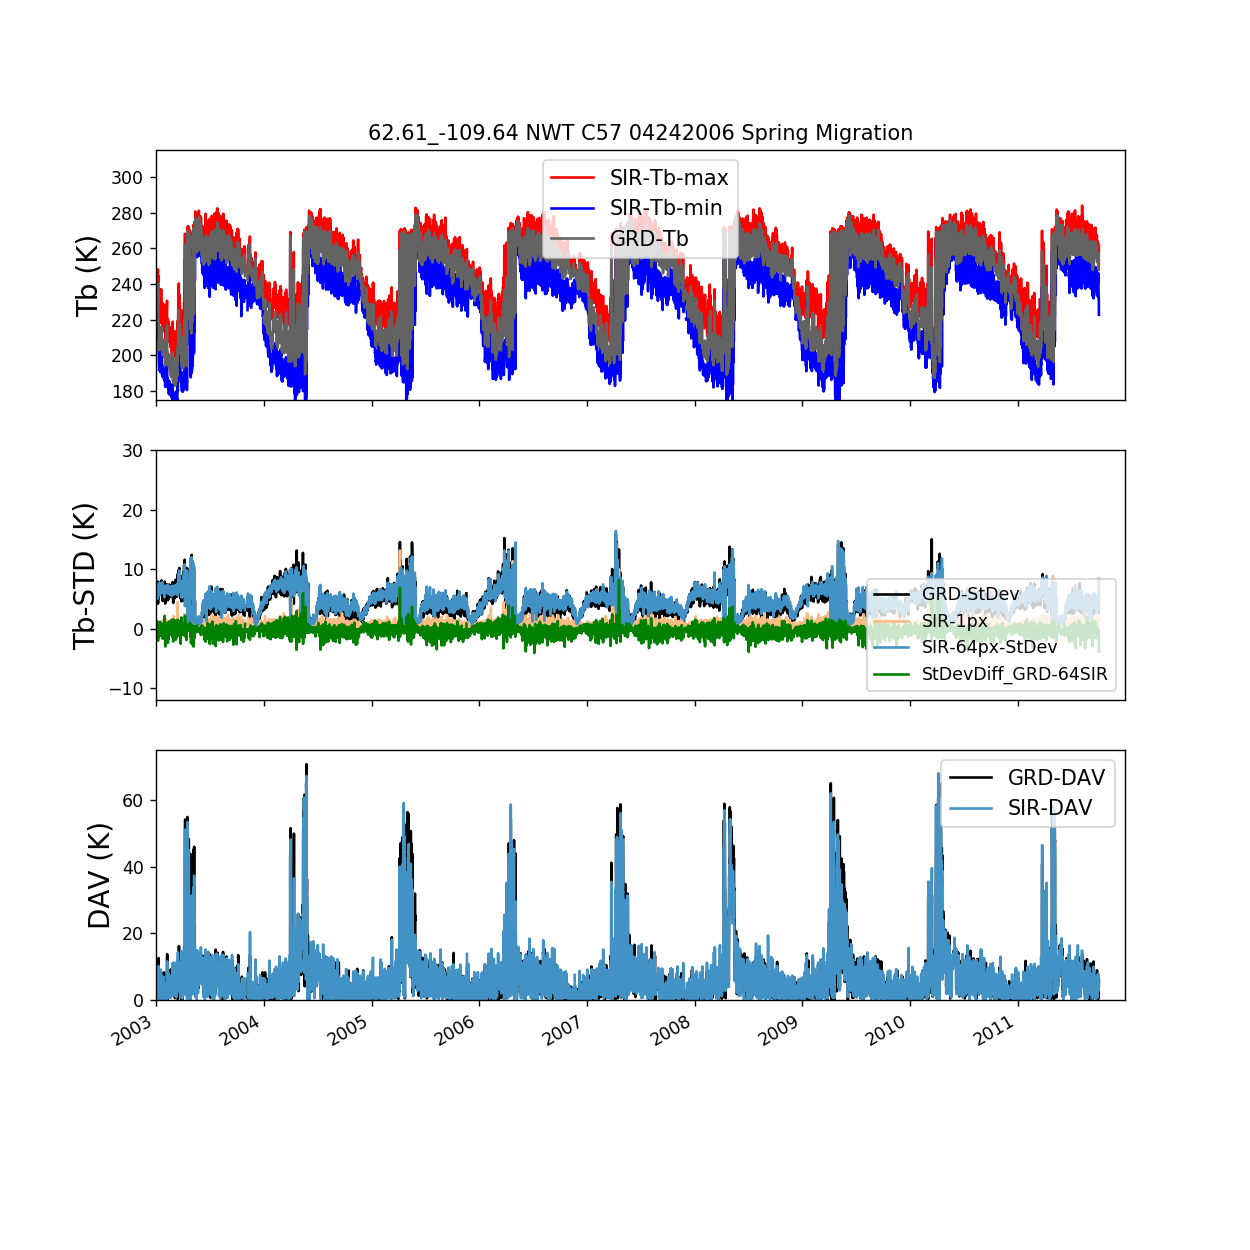

In [21]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1, sharex=True, figsize=(10,10))
#ax.xlim('2003-1-1', '2003-12-31')
ax1.set_title(str(lat_start)+'_'+str(lon_start)+' '+Site)

#Tb_sd_frame_GRD.plot(xlim=['2003-01-01','2003-12-31'])

ax1.plot(Tb_64_max, color='red', label='SIR-Tb-max')
ax1.plot(Tb_64_min, color='blue', label='SIR-Tb-min')
#ax1.plot(Tb_nearest, color = 'black',label='putnamehere')
ax1.plot(Tb_frame_GRD, color='#636363', label='GRD-Tb')
ax1.set_ylabel('Tb (K)', fontsize=16)
ax1.set_ylim(175,315)
#ax1.yticks(fontsize=12)
ax1.legend(fontsize=12)
ax2.plot(Tb_sd_frame_GRD, color='black', label='GRD-StDev')
ax2.plot(Tb_std_frame[str(rows_cols[0][0])+','+str(rows_cols[1][0])], color='#fdbb84', label='SIR-1px')
ax2.set_ylabel('Tb-STD (K)',fontsize=16)
ax2.plot(Tb_std_64, color='#4292c6',label='SIR-64px-StDev')
ax2.plot(Tb_sd_diff, label='StDevDiff_GRD-64SIR', color='green')
ax2.legend(fontsize=10,loc='lower right')
ax2.set_ylim(-12,30)
ax3.plot(DAV_GRD_frame, color='black', label='GRD-DAV')
ax3.plot(DAV_SIR_frame[str(rows_cols[0][0])+','+str(rows_cols[1][0])], color='#4292c6', label='SIR-DAV')
ax3.set_ylabel('DAV (K)',fontsize=16)
ax3.legend(fontsize=12)
ax3.set_ylim(0,75)
ax1.set_xlim('2003-01-01', '2011-12-31')

fig.autofmt_xdate()
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57_spmig_amsre_timeseries2003-11.png')


<IPython.core.display.Javascript object>


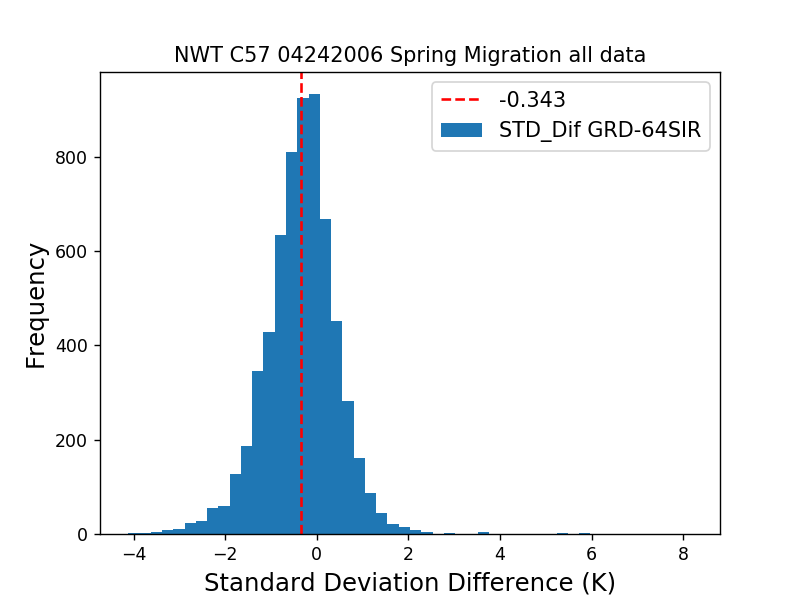

In [22]:
# histogram of the difference between GRD_Tb_std variable and the computed std of the 64 SIR pixels
#plt.close()
fig,ax=plt.subplots()
values=Tb_sd_diff.dropna().values
ax.hist(values,bins=50, label='STD_Dif GRD-64SIR')
ax.set_title(Site+' all data')
ax.axvline(x=Tb_sd_diff.mean(), color='red', linestyle='dashed', label=Tb_sd_diff.mean().round(3))
ax.legend(fontsize=12)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_xlabel('Standard Deviation Difference (K)',fontsize=14)
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57_spmig_amsre_SDdifall.png')

In [ ]:
# Plot Tb map
date='2006-04-24' # specify date of interest
obs=1 # 0 or 1 for morning or evening observation

# load Tb_std_dev array
array=Tb_frame.loc[date].values
array=array[obs]
GRD=Tb_frame_GRD.loc[date].values
GRD=GRD[obs]

fig = plt.figure(figsize=(8,8))
# create figure and axes instances
#fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#ax = fig.add_subplot(121)
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
m.scatter(x,y,c=array, s=100, marker='s',lw=0, cmap='Greys', alpha=.8)  # cmap='Blues'
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
plt.title('Tb_'+date+' '+str(obs))

# plot a red line on colorbar for the MOD for the GRD pixel
cbar=plt.colorbar()
cbar.ax.hlines(cbar.norm(GRD), 0, 1, color='red') 
plt.clim(230,250)  #color bar limits

plt.show()
#plt.savefig('../jmr_plots/PnOWL_amsre_TB_040107-1.png')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

#x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
#m.scatter(x,y,c=MOD_DOY_array, s=150, marker='s',lw=0,cmap='Blues', alpha=.0)
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
#plt.title('Tb - std dev')
#plt.colorbar()
plt.show()
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57spmig_amsre_Tb20060424.png')



In [23]:
GRD


NameError: name 'GRD' is not defined

In [24]:
# returns the average Jan-Feb DAV for each pixel for each year - SIR
Jan_Feb_DAV=Winter_DAV(CETB_SIR, cal_date, cal_year, Years, rows_cols_env)
Jan_Feb_DAV

656,216   656,217   656,218   656,219   656,220   656,221   656,222  \
2003  4.912306  5.196268  4.775703  4.722143  4.666794  4.127294  3.663471   
2004  3.529710  3.505999  3.634633  3.867911  3.730306  3.824663  4.135531   
2005  3.247051  3.406149  3.649942  3.382179  3.352372  3.520677  4.120380   
2006  3.925009  3.895519  4.001040  4.156327  4.251563  4.167766  4.317055   
2007  3.344642  3.314159  3.503546  3.499119  3.542307  3.427522  3.509087   
2008  3.617428  3.681011  3.812608  3.951377  3.941887  4.115484  4.514891   
2009  3.994905  4.202926  4.235628  4.298773  4.103935  4.403121  4.412883   
2010  3.465642  3.551527  3.641196  3.860810  3.838037  3.716323  3.638442   
2011  3.672373  3.815502  3.716071  3.745302  3.684289  3.420786  3.264020   

       656,223   657,216   657,217    ...      662,222   662,223   663,216  \
2003  3.474449  4.647348  4.878084    ...     4.305744  4.532654  3.255490   
2004  3.900948  3.335700  3.353624    ...     3.302297  3.615570  3.232810   
2005  4.184868  3.268418  3.532202    ...     3.618861  3.681633  2.749871   
2006  3.904502  3.719971  3.840061    ...     3.628217  3.952897  3.373459   
2007  3.548600  3.246699  3.428836    ...     3.373724  4.131578  2.801103   
2008  4.406841  3.473916  3.711349    ...     3.603409  3.847125  3.456370   
2009  4.465100  3.907928  4.031887    ...     3.789346  3.978160  3.200697   
2010  3.643474  3.312719  3.556381    ...     3.841006  4.037053  3.240600   
2011  3.630165  3.556138  3.721555    ...     3.918618  4.457679  3.138079   

       663,217   663,218   663,219   663,220   663,221   663,222   663,223  
2003  3.898820  4.151882  4.344160  4.214289  4.052183  4.823244  5.085452  
2004  3.299997  3.770607  3.451368  3.333694  3.382875  3.833101  4.079669  
2005  3.316774  3.619415  3.519422  3.098439  3.281337  3.626749  3.753042  
2006  3.941549  4.072248  3.848884  3.590904  3.951996  3.945346  4.453339  
2007  3.160225  3.321818  3.270523  3.348359  3.236339  3.916466  4.609564  
2008  4.000887  4.563432  4.422912  4.249269  4.629914  4.358718  4.441223  
2009  3.416852  3.886469  4.038392  3.643467  3.431172  4.559568  4.544217  
2010  3.816857  4.217009  4.436797  4.535670  3.875751  4.181821  4.683787  
2011  3.323822  3.958319  4.045794  3.887028  4.037479  4.608441  5.605608  

[9 rows x 64 columns]

In [25]:
Jan_Feb_DAV_avg=Jan_Feb_DAV.mean(axis=0)
Jan_Feb_DAV_avg=Jan_Feb_DAV_avg.values
#Jan_Feb_DAV_avg=np.round(Jan_Feb_DAV_avg)
Jan_Feb_DAV_avg

array([3.745452 , 3.8410068, 3.8855963, 3.94266  , 3.9012766, 3.858182 ,
       3.9528623, 3.9065502, 3.6076486, 3.7837758, 3.9239943, 3.882017 ,
       3.8575711, 3.9131055, 3.941695 , 3.9015002, 3.451403 , 3.6044393,
       3.779299 , 3.7035854, 3.699118 , 3.8664432, 3.9779286, 3.6964378,
       3.3452055, 3.4689176, 3.6013117, 3.5921886, 3.6045864, 3.7951813,
       3.8345528, 3.5207794, 3.2283654, 3.4870212, 3.5474215, 3.4948215,
       3.4778814, 3.6243625, 3.6052828, 3.5138988, 3.196398 , 3.4047704,
       3.5218754, 3.5958142, 3.4628196, 3.496515 , 3.452423 , 3.7491636,
       3.176331 , 3.467585 , 3.78822  , 3.7411966, 3.5481513, 3.593162 ,
       3.7090247, 4.026039 , 3.1609423, 3.5750868, 3.9512439, 3.9309168,
       3.766791 , 3.7643385, 4.2059393, 4.583989 ], dtype=float32)

In [26]:
# returns the average Jan-Feb DAV for the GRD pixel for each year
Jan_Feb_DAV_GRD=Winter_DAV(CETB_GRD, cal_date, cal_year, Years, rows_cols_GRD)
Jan_Feb_DAV_GRD

82,27
2003  4.060528
2004  2.793978
2005  2.868934
2006  3.390307
2007  3.077241
2008  3.242039
2009  3.411212
2010  3.008919
2011  3.143279

In [27]:
# avg Jan-Feb DAV for all years - GRD pixel
Jan_Feb_DAV_GRD_all=np.nanmean(Jan_Feb_DAV_GRD)
Jan_Feb_DAV_GRD_all

3.2218263

<IPython.core.display.Javascript object>


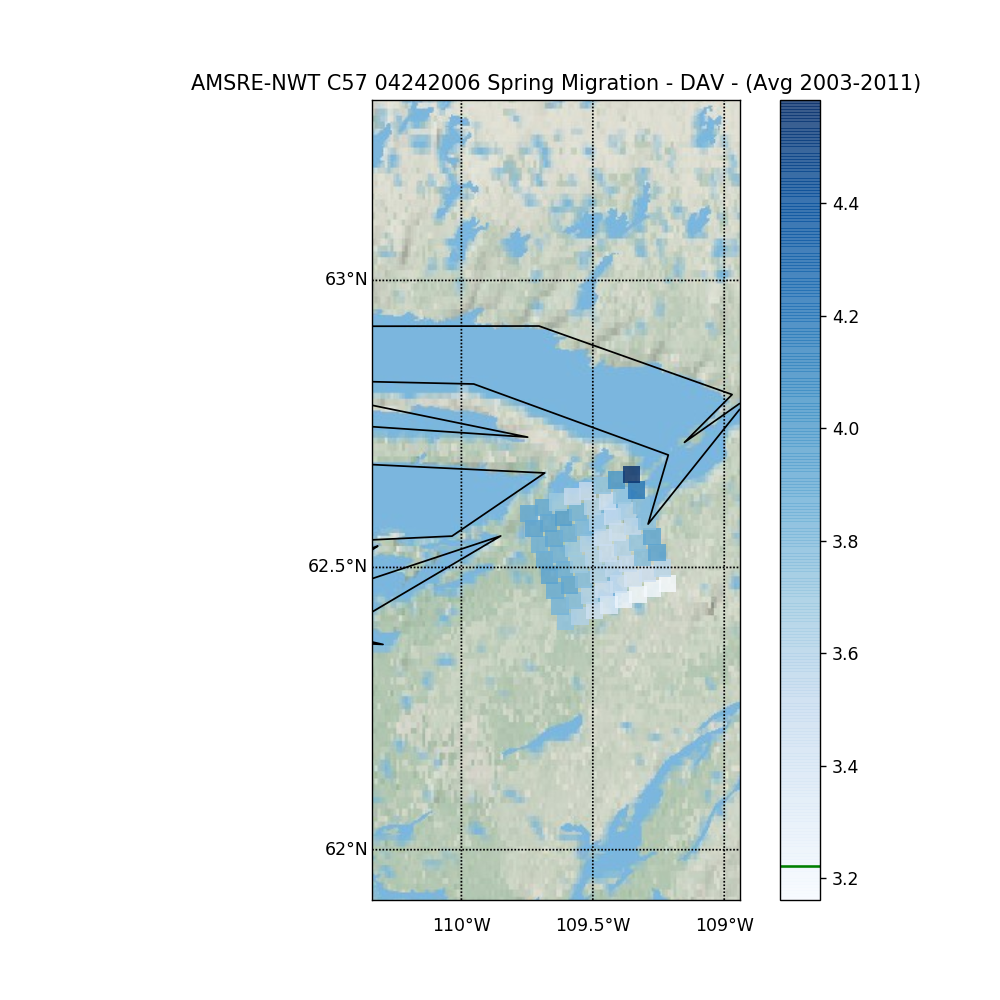

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-12282992.614129806,8837833.760236332,-12127145.327019224,9176670.439238701&bboxSR=3857&imageSR=3857&size=1500,3261&dpi=96&format=png32&f=image


<IPython.core.display.Javascript object>


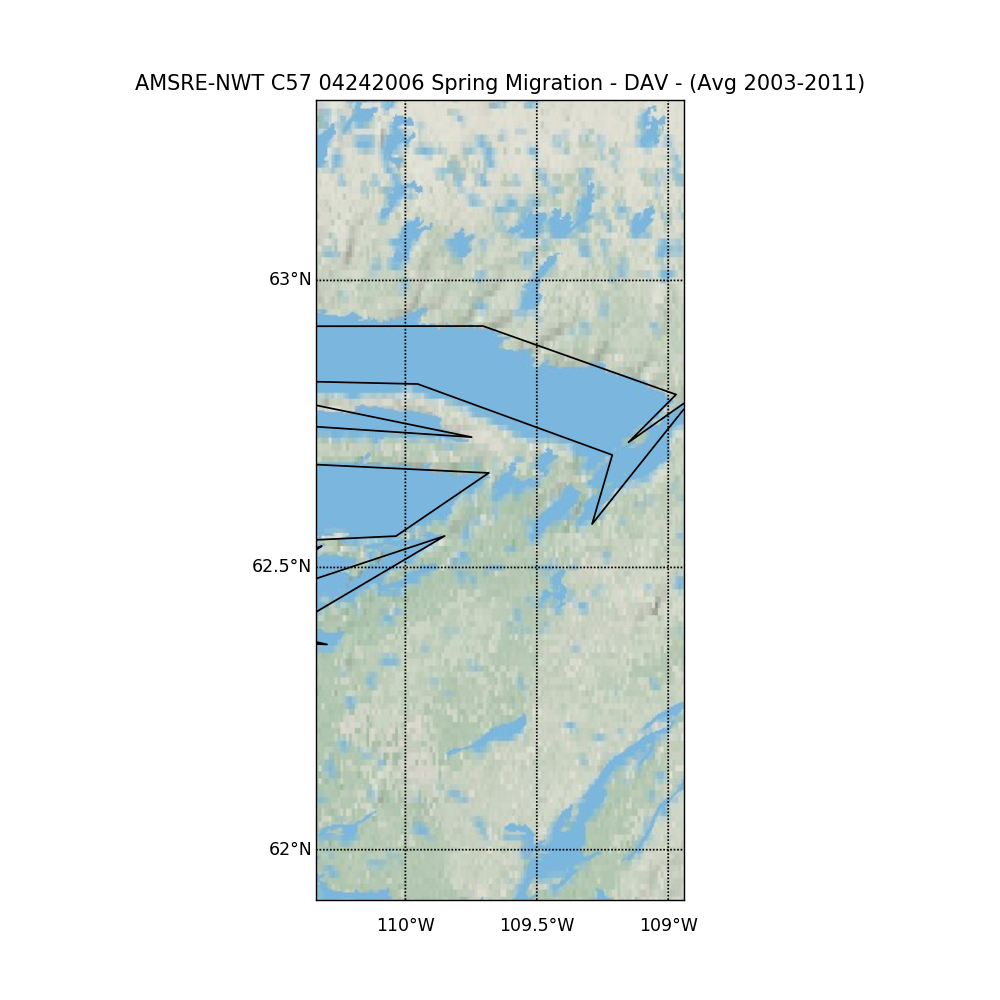

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-12282992.614129806,8837833.760236332,-12127145.327019224,9176670.439238701&bboxSR=3857&imageSR=3857&size=1500,3261&dpi=96&format=png32&f=image


In [28]:
# PLOT WINTER DAV MAP
# if getting errors, likely because there are 0 or only 1 early melt event for the subset
fig = plt.figure(figsize=(8,8))
# create figure and axes instances
#fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#ax = fig.add_subplot(121)
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
m.scatter(x,y,c=Jan_Feb_DAV_avg, s=100, marker='s',lw=0,cmap='Blues', alpha=.8)
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
plt.title(sensor_SIR+'-'+Site+' - DAV - (Avg '+str(Years[0])+'-'+str(Years[-1])+')')

# plot a red line on colorbar for the GRD mean - all years
cbar=plt.colorbar()
cbar.ax.hlines(cbar.norm(Jan_Feb_DAV_GRD_all), 0, 1, color='green') 

plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

#x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
#m.scatter(x,y,c=MOD_DOY_array, s=150, marker='s',lw=0,cmap='Blues', alpha=.0)
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
plt.title(sensor_SIR+'-'+Site+' - DAV - (Avg '+str(Years[0])+'-'+str(Years[-1])+')')
#plt.colorbar()
plt.show()



<IPython.core.display.Javascript object>


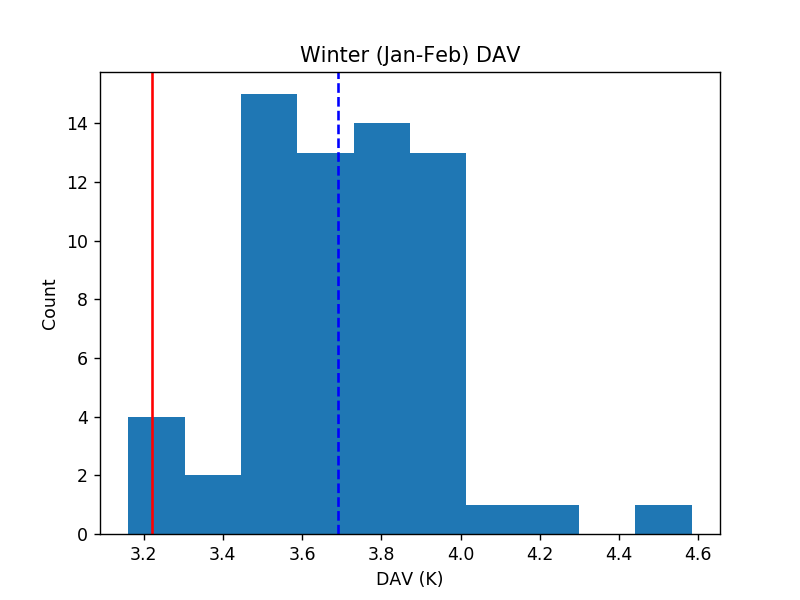

In [29]:
# winter DAV histogram
plt.close()
fig,ax=plt.subplots()
ax.hist(Jan_Feb_DAV_avg)
avg=np.mean(Jan_Feb_DAV_avg)  # calculate average winter DAV all pixels
ax.axvline(x=avg, color='blue', linestyle='dashed')  # plot a line for the average winter DAV for all pixels
ax.axvline(x=Jan_Feb_DAV_GRD_all, color='red')  # plot a line for winter DAV for GRD pixel
ax.set_xlabel('DAV (K)')
ax.set_ylabel('Count')
ax.set_title('Winter (Jan-Feb) DAV')

In [30]:
#need to run this cell for the max DAV to work
y_dims_list=list(range(len(CETB_SIR[0,:,0])))  # creates a list of the y-dimension pixel indices, used for plotting
x_dims_list=list(range(len(CETB_SIR[0,0,:])))	# creates a list of the x-dimension pixel indices, for plotting
y_s=list(range(rows_cols_env[0],rows_cols_env[1]))  # makes a list of the y(row) numbers so the dataframe of early melt events can be indexed
x_s=list(range(rows_cols_env[2],rows_cols_env[3]))  # makes a list of the x(col) numbers so the dataframe of early melt events can be indexed

In [31]:
# create array of the max DAV for each pixel for all years
DAV_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=DAV_SIR[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        DAV_frame=pd.concat([DAV_frame,column],axis=1)
DAV_frame=DAV_frame.set_index(cal_date)
#DAV_frame=DAV_frame.groupby(pd.Grouper(freq='A')).max()
DAV_max_array=DAV_frame.max().values
DAV_max_array

array([76.04001 , 71.94    , 69.58    , 65.47998 , 60.530014, 60.08998 ,
       65.32999 , 69.84    , 72.27998 , 70.469986, 69.19998 , 64.33998 ,
       59.880005, 59.940002, 62.86    , 68.41    , 70.990005, 68.770004,
       68.32999 , 66.25    , 61.399994, 61.02002 , 64.729996, 68.030014,
       76.04999 , 69.43001 , 67.70999 , 65.05002 , 64.73999 , 65.32999 ,
       65.76001 , 69.15999 , 86.06001 , 80.67998 , 68.93001 , 68.67998 ,
       69.08    , 66.759995, 65.21001 , 65.36    , 85.06999 , 79.68001 ,
       75.11998 , 72.20999 , 69.43001 , 65.89    , 64.639984, 64.42    ,
       86.47002 , 84.25998 , 80.490005, 72.44    , 69.73999 , 66.17001 ,
       64.31999 , 62.320007, 90.59999 , 87.7     , 78.01999 , 71.04999 ,
       68.17999 , 66.56999 , 62.440002, 62.15999 ], dtype=float32)

In [32]:
# create array of the max DAV for each pixel for year of interest
year=2006  #specify year
DAV_max_array_year=DAV_frame[str(year)].max().values
DAV_max_array_year

array([58.869995, 57.429993, 56.12999 , 52.62999 , 51.089996, 48.65999 ,
       49.67    , 54.309982, 57.47998 , 57.309998, 55.78    , 52.13002 ,
       51.449997, 50.520004, 50.249985, 56.369995, 55.240005, 56.089996,
       55.190002, 49.87999 , 49.020004, 48.259995, 49.03    , 58.62001 ,
       56.690002, 55.300003, 55.51001 , 51.39    , 47.479996, 49.750015,
       52.90001 , 56.460007, 73.93999 , 55.67    , 53.249985, 52.42    ,
       46.69998 , 50.690002, 49.240005, 50.310013, 71.72    , 73.749985,
       60.360016, 50.449997, 48.990005, 45.87001 , 49.01999 , 48.910004,
       69.770004, 65.14    , 62.58    , 56.969986, 49.219986, 47.76999 ,
       46.059982, 47.240005, 69.01999 , 63.42    , 58.02002 , 57.660004,
       50.689987, 51.34001 , 45.87001 , 46.579987], dtype=float32)

In [33]:
DAV_max_GRD=np.nanmax(DAV_GRD)
DAV_max_GRD

70.75

In [34]:
#Note this year needs to be the same as the max dav plot below
#year=2005
DAV_max_GRD_year=np.nanmax(DAV_GRD[cal_year==year])
DAV_max_GRD_year

54.600006

<IPython.core.display.Javascript object>


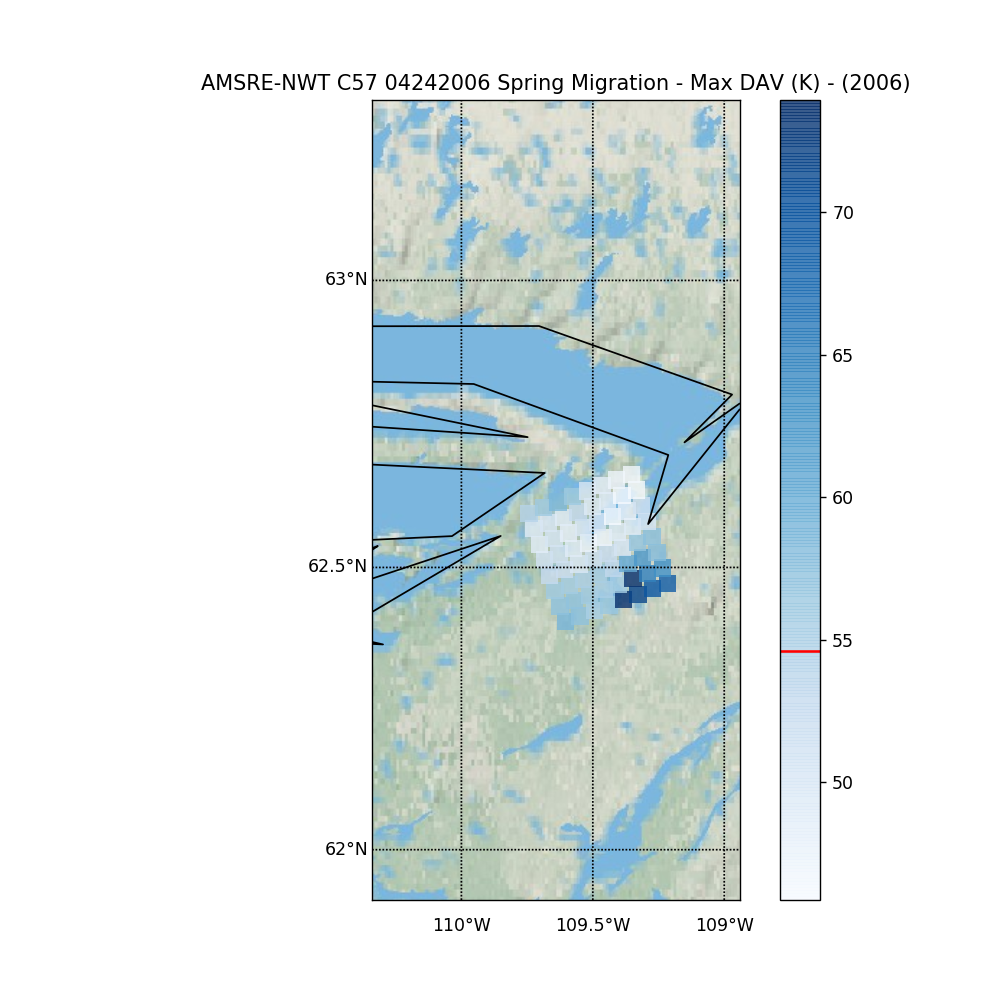

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-12282992.614129806,8837833.760236332,-12127145.327019224,9176670.439238701&bboxSR=3857&imageSR=3857&size=1500,3261&dpi=96&format=png32&f=image


<IPython.core.display.Javascript object>


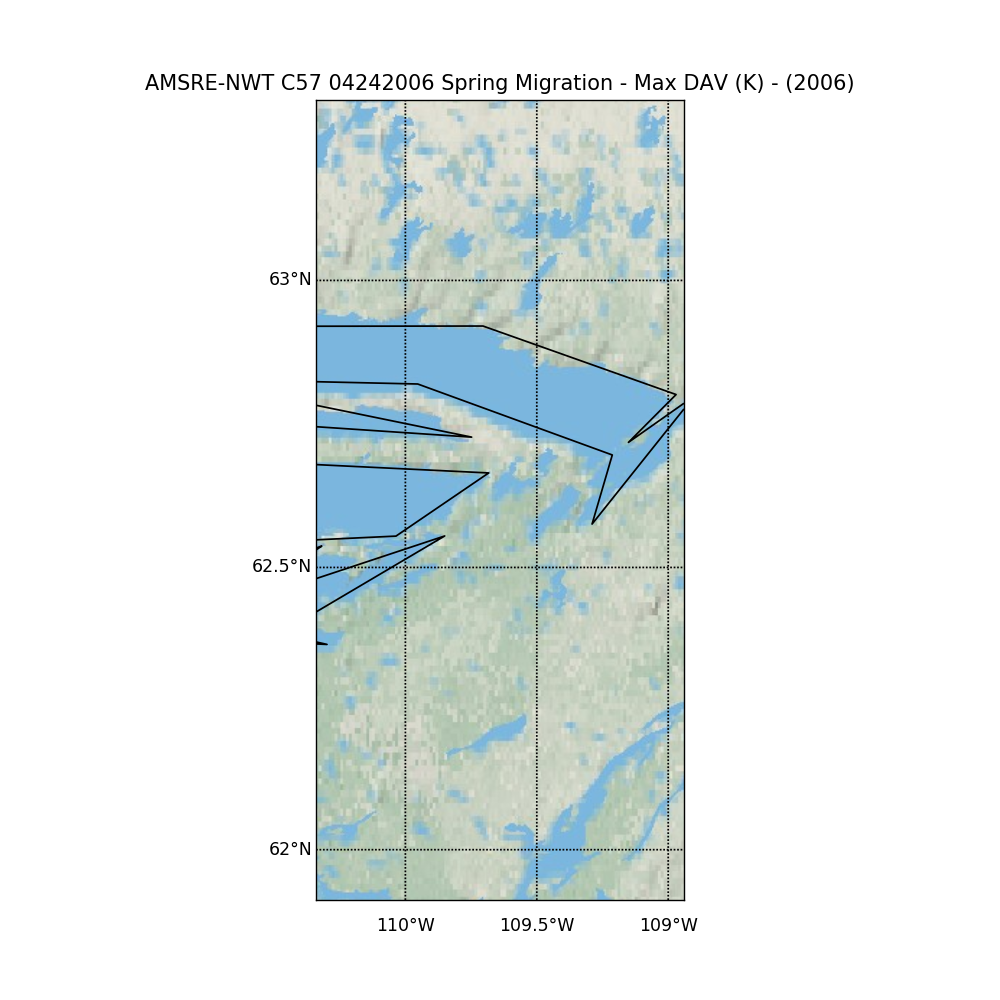

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-12282992.614129806,8837833.760236332,-12127145.327019224,9176670.439238701&bboxSR=3857&imageSR=3857&size=1500,3261&dpi=96&format=png32&f=image


In [35]:
# PLOT MAX DAV MAP
#plot_type='all'
year = 2006
plot_type=year
#NOTE YEAR SPECIFIED UP A FEW LEVELS (~3)
#year=2005

if plot_type=='all':
    array=DAV_max_array
    title=sensor_SIR+'-'+Site+' - Max DAV (K) - (Avg of '+str(Years[0])+'-'+str(Years[-1])+')'
    GRD=DAV_max_GRD
elif plot_type==year:

    array=DAV_max_array_year
    GRD=DAV_max_GRD_year
    title=sensor_SIR+'-'+Site+' - Max DAV (K) - ('+str(year)+')'

fig = plt.figure(figsize=(8,8))
# create figure and axes instances
#fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#ax = fig.add_subplot(121)
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
m.scatter(x,y,c=array, s=100, marker='s',lw=0,cmap='Blues', alpha=.8)
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
plt.title(title)

# plot a red line on colorbar for the GRD max
cbar=plt.colorbar()
#cbar.ax.hlines(cbar.norm(DAV_max_GRD), 0, 1, color='red') 
cbar.ax.hlines(cbar.norm(DAV_max_GRD_year), 0, 1, color='red')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_start,lat_0=lat_start,lat_ts=90.,\
            llcrnrlat=(lat_start-.7),urcrnrlat=(lat_start+.7),\
            llcrnrlon=(lon_start-.7),urcrnrlon=(lon_start+.7),\
            rsphere=6371200.,resolution='l',area_thresh=10000, epsg=3857)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.etopo(scale=5, alpha=0.7)
#m.bluemarble(scale=1)
parallels = np.arange(0.,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.arcgisimage(service='World_Physical_Map', xpixels = 1500, verbose= True)

#x,y=m(pixel_lons, pixel_lats)
#m.plot(x,y, 'bs', markersize=11, markeredgewidth=1, alpha=0.2)
#m.scatter(x,y,c=MOD_DOY_array, s=150, marker='s',lw=0,cmap='Blues', alpha=.0)
#x,y=m(ISAlons,ISAlats)
#m.plot(x,y,'ro',markersize=2,markeredgewidth=0.0)
plt.title(title)
#plt.colorbar()
plt.show()

## Histograms

<IPython.core.display.Javascript object>


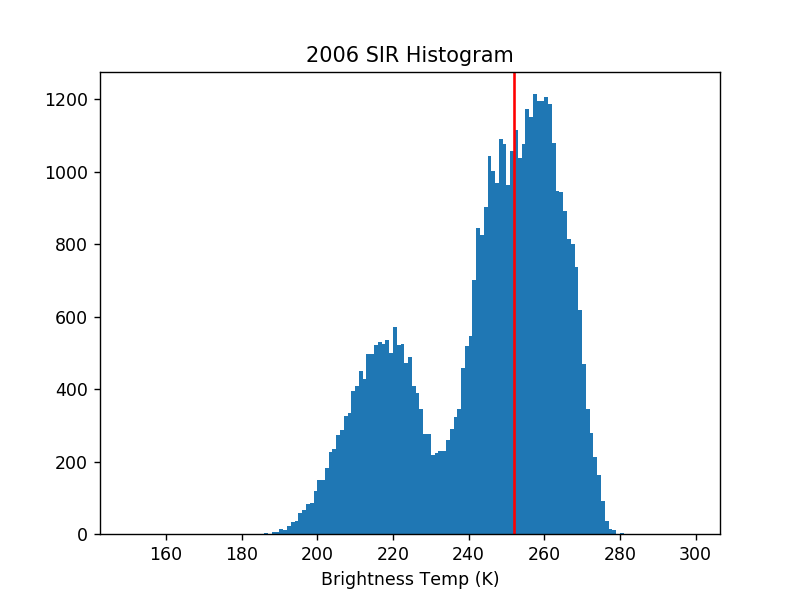

In [36]:
# generate histogram - SIR - pick year 
year=2006  # specify year here
Tb_threshold=252  #specify threshold
data = CETB_SIR[cal_year==year] # CETB_data for all pixels in subset
data = data[data>=0]
bins = range(150,300)  # bins for histogram
fig,ax=plt.subplots()
ax.axvline(x=Tb_threshold, color='red')
ax.hist(data, bins)
ax.set_title(str(year)+' SIR Histogram')
#ax.set_title(prefix+'row'+str(x)+'col'+str(y))
ax.set_xlabel('Brightness Temp (K)')
#fig.savefig('/home/mij216/Documents/GLaIL/'+prefix+'row'+str(x)+'col'+str(y)+'.png')
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57spmig04242006_amsre_histsir2006.png')

<IPython.core.display.Javascript object>


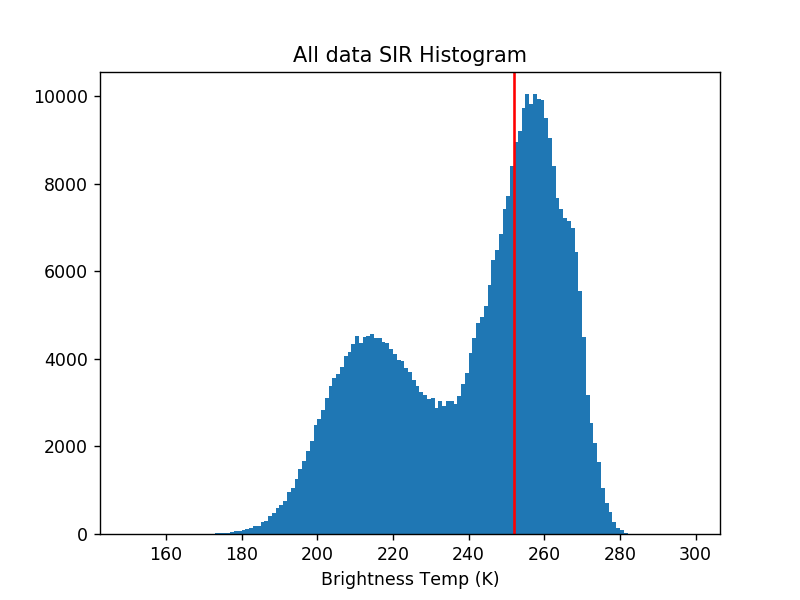

In [37]:
# generate histogram - SIR - all data
#year=2005
#Tb_threshold=252
data = CETB_SIR[:] # CETB_data for all pixels in subset
data = data[data>=0]
bins = range(150,300)  # bins for histogram
fig,ax=plt.subplots()
ax.hist(data, bins)
ax.set_title('All data SIR Histogram')
ax.axvline(x=Tb_threshold, color='red')
#ax.set_title(prefix+'row'+str(x)+'col'+str(y))
ax.set_xlabel('Brightness Temp (K)')
#fig.savefig('/home/mij216/Documents/GLaIL/'+prefix+'row'+str(x)+'col'+str(y)+'.png')
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57spmig_amsre_histsirALL.png')

<IPython.core.display.Javascript object>


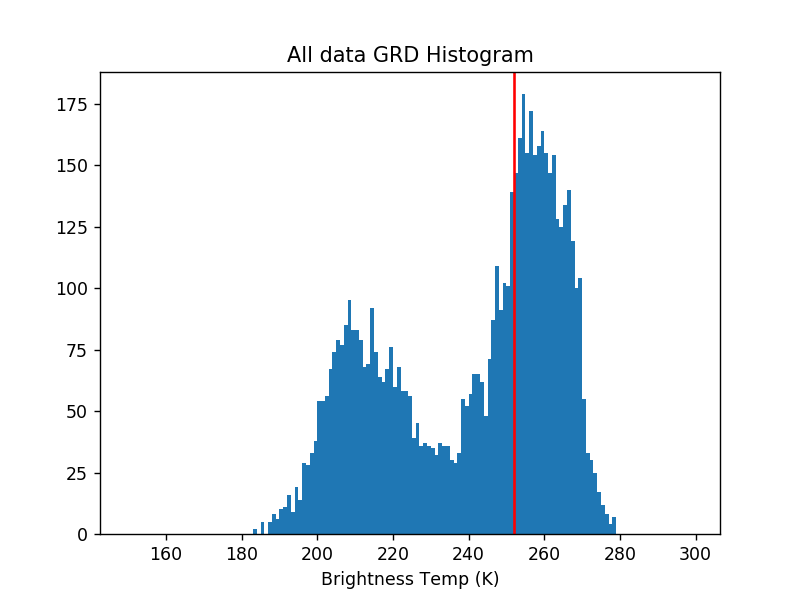

In [38]:
# generate histogram - GRD - all data
data = CETB_GRD[:] # CETB_data for all pixels in subset
data = data[data>=0]
bins = range(150,300)  # bins for histogram
fig,ax=plt.subplots()
ax.hist(data, bins)
ax.set_title('All data GRD Histogram')
ax.axvline(x=Tb_threshold, color='red')
#ax.set_title(prefix+'row'+str(x)+'col'+str(y))
ax.set_xlabel('Brightness Temp (K)')
#fig.savefig('/home/mij216/Documents/GLaIL/'+prefix+'row'+str(x)+'col'+str(y)+'.png')
plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C5704242006_amsre_histGRDall.png')

In [39]:
#used this to update/import edited version of CETB_analysis
#import importlib
#import sys
#importlib.reload(sys.modules['CETB_analysis'])
#from CETB_analysis import min_max_series

In [41]:
# min/max/avg time series and histogram of the 64 SIR pixels, plus the GRD pixel
#checkif this is per year or all
fig1,fig2=min_max_series(CETB_GRD, CETB_SIR, cal_date, cal_year, year, str(lat_start)+'_'+str(lon_start))
#plt.savefig('/home/jmr204/noisy/plots/MariahNWT/C57spmig_amsre_minmaxhists2006.png')

fig1.savefig('/home/jmr204/noisy/MariahNWT/C57spmig_amsre_minmaxhist2006.png')
fig2.savefig('/home/jmr204/noisy/MariahNWT/C57spmig_amsre_minmaxyear2006.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '/home/jmr204/noisy/MariahNWT/C57spmig_amsre_minmaxhist2006.png'

## TIME SERIES

<IPython.core.display.Javascript object>


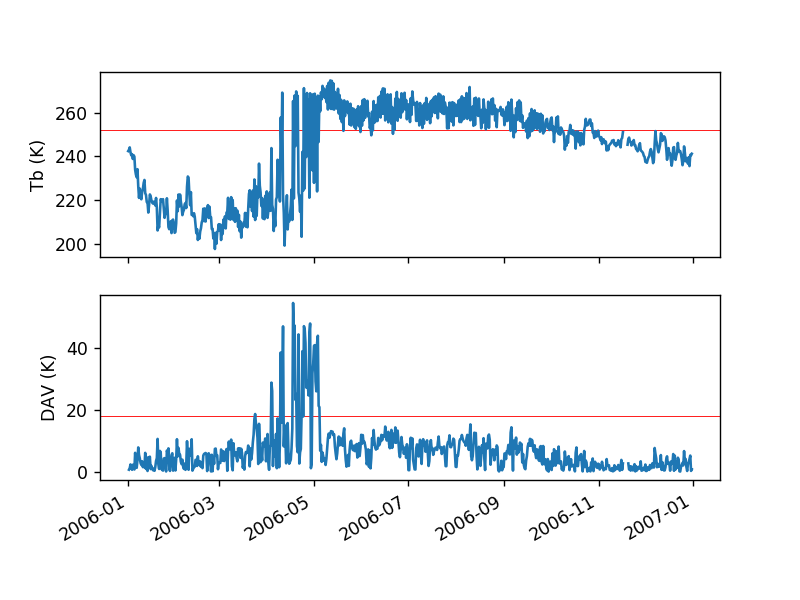

In [42]:
# Tb and DAV time series for GRD pixel, pick one year
#year=2003
Tb_threshold=252
DAV_threshold=18
TbDAV_series_one_year(CETB_GRD,DAV_GRD, cal_date, cal_year, year, Tb_threshold, DAV_threshold)

<IPython.core.display.Javascript object>


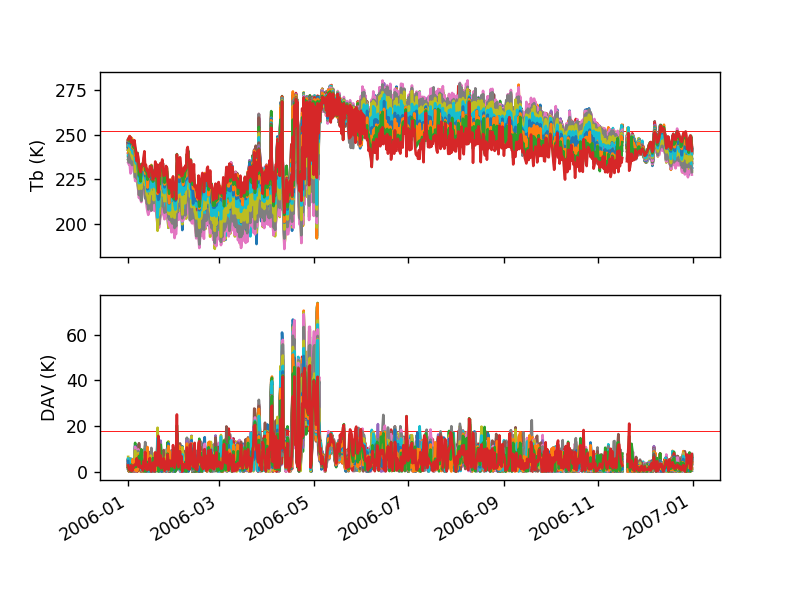

In [43]:
# Tb and DAV time series for SIR pixels, pick one year
#year=2003
#Tb_threshold=252
#DAV_threshold=18
TbDAV_series_one_year(CETB_SIR, DAV_SIR, cal_date, cal_year, year, Tb_threshold, DAV_threshold)

<IPython.core.display.Javascript object>


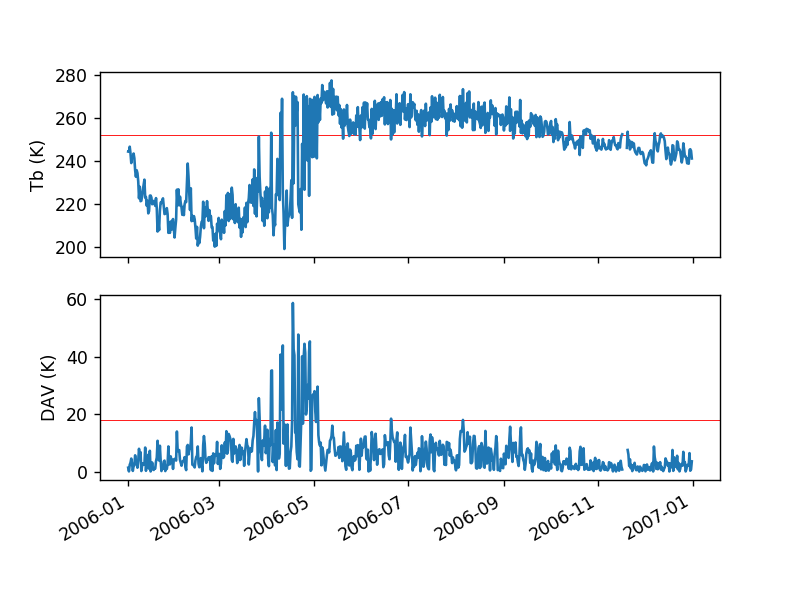

In [44]:
# Tb and DAV time series of the single SIR pixel closest to the user-specified lat/lon at top of notebook
year=2006
#Tb_threshold=252
#DAV_threshold=18
data=read_Tb(datadir_SIR, prefix_SIR, Years,rows_cols[0][0],rows_cols[0][0]+1,rows_cols[1][0],rows_cols[1][0]+1)
SIR_1px=data[0]
DAV_1px=calc_DAV(SIR_1px)
TbDAV_series_one_year(SIR_1px, DAV_1px, cal_date, cal_year, year, Tb_threshold, DAV_threshold) 

## CREATE CSVs

In [45]:
TB_SIR_1px=pd.DataFrame([SIR_1px.flatten()]).T

TB_SIR_1px.index=cal_date
TB_SIR_1px

0
2003-01-01 01:00:00  231.039993
2003-01-01 13:00:00  235.409988
2003-01-02 01:00:00  234.599991
2003-01-02 13:00:00  233.830002
2003-01-03 01:00:00  232.789993
2003-01-03 13:00:00  237.369995
2003-01-04 01:00:00  232.110001
2003-01-04 13:00:00  231.559998
2003-01-05 01:00:00  235.289993
2003-01-05 13:00:00  243.250000
2003-01-06 01:00:00  239.099991
2003-01-06 13:00:00  243.659988
2003-01-07 01:00:00  241.779999
2003-01-07 13:00:00  237.000000
2003-01-08 01:00:00  241.309998
2003-01-08 13:00:00  232.369995
2003-01-09 01:00:00  222.179993
2003-01-09 13:00:00  219.709991
2003-01-10 01:00:00  213.629990
2003-01-10 13:00:00  215.169998
2003-01-11 01:00:00  210.909988
2003-01-11 13:00:00  210.839996
2003-01-12 01:00:00  212.299988
2003-01-12 13:00:00  212.610001
2003-01-13 01:00:00  212.860001
2003-01-13 13:00:00  213.220001
2003-01-14 01:00:00  213.549988
2003-01-14 13:00:00  213.479996
2003-01-15 01:00:00  212.929993
2003-01-15 13:00:00  214.869995
...                         ...
2011-12-17 01:00:00         NaN
2011-12-17 13:00:00         NaN
2011-12-18 01:00:00         NaN
2011-12-18 13:00:00         NaN
2011-12-19 01:00:00         NaN
2011-12-19 13:00:00         NaN
2011-12-20 01:00:00         NaN
2011-12-20 13:00:00         NaN
2011-12-21 01:00:00         NaN
2011-12-21 13:00:00         NaN
2011-12-22 01:00:00         NaN
2011-12-22 13:00:00         NaN
2011-12-23 01:00:00         NaN
2011-12-23 13:00:00         NaN
2011-12-24 01:00:00         NaN
2011-12-24 13:00:00         NaN
2011-12-25 01:00:00         NaN
2011-12-25 13:00:00         NaN
2011-12-26 01:00:00         NaN
2011-12-26 13:00:00         NaN
2011-12-27 01:00:00         NaN
2011-12-27 13:00:00         NaN
2011-12-28 01:00:00         NaN
2011-12-28 13:00:00         NaN
2011-12-29 01:00:00         NaN
2011-12-29 13:00:00         NaN
2011-12-30 01:00:00         NaN
2011-12-30 13:00:00         NaN
2011-12-31 01:00:00         NaN
2011-12-31 13:00:00         NaN

[6574 rows x 1 columns]

In [46]:
DAV_SIR_1px=pd.DataFrame([DAV_1px.flatten()]).T
DAV_SIR_1px.index=cal_date
DAV_SIR_1px

0
2003-01-01 01:00:00   0.000000
2003-01-01 13:00:00   4.369995
2003-01-02 01:00:00   0.809998
2003-01-02 13:00:00   0.769989
2003-01-03 01:00:00   1.040009
2003-01-03 13:00:00   4.580002
2003-01-04 01:00:00   5.259995
2003-01-04 13:00:00   0.550003
2003-01-05 01:00:00   3.729996
2003-01-05 13:00:00   7.960007
2003-01-06 01:00:00   4.150009
2003-01-06 13:00:00   4.559998
2003-01-07 01:00:00   1.879990
2003-01-07 13:00:00   4.779999
2003-01-08 01:00:00   4.309998
2003-01-08 13:00:00   8.940002
2003-01-09 01:00:00  10.190002
2003-01-09 13:00:00   2.470001
2003-01-10 01:00:00   6.080002
2003-01-10 13:00:00   1.540009
2003-01-11 01:00:00   4.260010
2003-01-11 13:00:00   0.069992
2003-01-12 01:00:00   1.459991
2003-01-12 13:00:00   0.310013
2003-01-13 01:00:00   0.250000
2003-01-13 13:00:00   0.360001
2003-01-14 01:00:00   0.329987
2003-01-14 13:00:00   0.069992
2003-01-15 01:00:00   0.550003
2003-01-15 13:00:00   1.940002
...                        ...
2011-12-17 01:00:00        NaN
2011-12-17 13:00:00        NaN
2011-12-18 01:00:00        NaN
2011-12-18 13:00:00        NaN
2011-12-19 01:00:00        NaN
2011-12-19 13:00:00        NaN
2011-12-20 01:00:00        NaN
2011-12-20 13:00:00        NaN
2011-12-21 01:00:00        NaN
2011-12-21 13:00:00        NaN
2011-12-22 01:00:00        NaN
2011-12-22 13:00:00        NaN
2011-12-23 01:00:00        NaN
2011-12-23 13:00:00        NaN
2011-12-24 01:00:00        NaN
2011-12-24 13:00:00        NaN
2011-12-25 01:00:00        NaN
2011-12-25 13:00:00        NaN
2011-12-26 01:00:00        NaN
2011-12-26 13:00:00        NaN
2011-12-27 01:00:00        NaN
2011-12-27 13:00:00        NaN
2011-12-28 01:00:00        NaN
2011-12-28 13:00:00        NaN
2011-12-29 01:00:00        NaN
2011-12-29 13:00:00        NaN
2011-12-30 01:00:00        NaN
2011-12-30 13:00:00        NaN
2011-12-31 01:00:00        NaN
2011-12-31 13:00:00        NaN

[6574 rows x 1 columns]

In [47]:
# CREATE CSV of GRD and SIR TB, GRD and SIR64 ST, and GRD And SIR DAV

# CREATE CSV OF TB, DAV, SD and sirSD FOR THE GRD PIXEL - ALL YEARS
Tb_frame=pd.DataFrame(CETB_GRD[:,0,0], index=cal_date)
DAV_frame=pd.DataFrame(DAV_GRD[:,0,0], index=cal_date)
GRD_data_out=pd.concat([Tb_frame,DAV_frame,TB_SIR_1px,DAV_SIR_1px,Tb_sd_frame_GRD,Tb_std_64,Tb_sd_diff],axis=1)
GRD_data_out.columns=['GRDTb36V','GRDDAV36V','SIRTB36V','SIRDAV36V','GRD_SD_36V','SIR64_to_SD_36V','SD_diff[GRD-SIR]']
GRD_data_out

GRDTb36V  GRDDAV36V    SIRTB36V  SIRDAV36V  GRD_SD_36V  \
2003-01-01 01:00:00  225.629990   0.000000  231.039993   0.000000        6.53   
2003-01-01 13:00:00  228.519989   2.889999  235.409988   4.369995        6.44   
2003-01-02 01:00:00  229.610001   1.090012  234.599991   0.809998        6.74   
2003-01-02 13:00:00  225.989990   3.620010  233.830002   0.769989        6.60   
2003-01-03 01:00:00  226.589996   0.600006  232.789993   1.040009        6.44   
2003-01-03 13:00:00  231.690002   5.100006  237.369995   4.580002        5.62   
2003-01-04 01:00:00  228.940002   2.750000  232.110001   5.259995        5.97   
2003-01-04 13:00:00  227.000000   1.940002  231.559998   0.550003        6.37   
2003-01-05 01:00:00  229.220001   2.220001  235.289993   3.729996        7.76   
2003-01-05 13:00:00  236.019989   6.799988  243.250000   7.960007        5.33   
2003-01-06 01:00:00  232.639999   3.379990  239.099991   4.150009        7.23   
2003-01-06 13:00:00  240.169998   7.529999  243.659988   4.559998        5.13   
2003-01-07 01:00:00  238.169998   2.000000  241.779999   1.879990        4.19   
2003-01-07 13:00:00  229.909988   8.260010  237.000000   4.779999        7.90   
2003-01-08 01:00:00  235.059998   5.150009  241.309998   4.309998        6.13   
2003-01-08 13:00:00  227.119995   7.940002  232.369995   8.940002        5.01   
2003-01-09 01:00:00  214.539993  12.580002  222.179993  10.190002        6.26   
2003-01-09 13:00:00  211.339996   3.199997  219.709991   2.470001        6.19   
2003-01-10 01:00:00  208.220001   3.119995  213.629990   6.080002        6.27   
2003-01-10 13:00:00  208.699997   0.479996  215.169998   1.540009        5.59   
2003-01-11 01:00:00  202.849991   5.850006  210.909988   4.260010        6.32   
2003-01-11 13:00:00  206.049988   3.199997  210.839996   0.069992        6.35   
2003-01-12 01:00:00  205.940002   0.109985  212.299988   1.459991        6.46   
2003-01-12 13:00:00  206.399994   0.459991  212.610001   0.310013        7.44   
2003-01-13 01:00:00  204.099991   2.300003  212.860001   0.250000        5.65   
2003-01-13 13:00:00  209.489990   5.389999  213.220001   0.360001        7.37   
2003-01-14 01:00:00  207.830002   1.659988  213.549988   0.329987        6.25   
2003-01-14 13:00:00  209.669998   1.839996  213.479996   0.069992        6.58   
2003-01-15 01:00:00  204.259995   5.410004  212.929993   0.550003        6.27   
2003-01-15 13:00:00  208.809998   4.550003  214.869995   1.940002        6.67   
...                         ...        ...         ...        ...         ...   
2011-12-17 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-17 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-18 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-18 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-19 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-19 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-20 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-20 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-21 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-21 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-22 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-22 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-23 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-23 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-24 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-24 13:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-25 01:00:00         NaN        NaN         NaN        NaN         NaN   
2011-12-25 13:00:00         NaN        NaN         NaN

In [48]:
GRD_data_out.to_csv('/home/jmr204/noisy/sd/'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_GRD+'_'+str(lat_start)+'_'+str(lon_start)+'DATA.csv')  # modify destination to save csv

In [57]:
# CREATE CSV OF TB FOR THE GRD PIXEL - ALL YEARS
Tb_frame=pd.DataFrame(CETB_GRD[:,0,0], index=cal_date)
Tb_frame.to_csv('/home/jmr204/noisy/noisytb_csv/'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_GRD+'_'+str(lat_start)+'_'+str(lon_start)+'TB.csv')  # modify destination to save csv

In [58]:
# CREATE CSV of DAV FOR THE GRD PIXEL - ALL YEARS
DAV_frame=pd.DataFrame(DAV_GRD[:,0,0], index=cal_date)
DAV_frame.to_csv('/home/jmr204/noisy/noisydav_csv/'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_GRD+'_'+str(lat_start)+'_'+str(lon_start)+'DAV.csv') # modify destination to save csv

In [55]:
# CREATE CSV of TB FOR 64pixel subset OF SIR PIXELS - ALL YEARS
Tb_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=CETB_SIR[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        Tb_frame=pd.concat([Tb_frame,column],axis=1)
Tb_frame=Tb_frame.set_index(cal_date)
Tb_frame.to_csv('/home/jmr204/noisy/noisytbSIR_csv/'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_SIR+'_'+str(lat_start)+'_'+str(lon_start)+'TB.csv')  # modify destination to save csv

In [56]:
# CREATE CSV of DAV FOR 64pixel subset OF SIR PIXELS - ALL YEARS
DAV_frame=pd.DataFrame()
for i in y_dims_list:
    for j in x_dims_list:
        column=pd.DataFrame(data=DAV_SIR[:,i,j], columns=[str(y_s[i])+','+str(x_s[j])])
        DAV_frame=pd.concat([DAV_frame,column],axis=1)
DAV_frame=DAV_frame.set_index(cal_date)
DAV_frame.to_csv('/home/jmr204/noisy/noisydavSIR_csv/'+sat_GRD+'_'+sensor_GRD+'-'+channel_GRD+'-'+alg_SIR+'_'+str(lat_start)+'_'+str(lon_start)+'DAV.csv')  # modify destination to save csv



In [ ]:
#testing
fig,ax=plt.subplots()
ax.plot(numpy.arange(5))
fig2,ax=plt.subplots()
ax.plot(numpy.arange(10))

In [ ]:
fig.savefig('/home/jmr204/noisy/testplot0to4.png')
fig2.savefig('/home/jmr204/noisy/testplot0to10.png')

In [ ]:
import sys

In [ ]:
sys.version

In [ ]:
import importlib
importlib.reload(some_module)